<a href="https://colab.research.google.com/github/anas1IA/Mutli_agents/blob/main/TP_correction__asynchronous_backtracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
class ColorAgent:
    def __init__(self, agent_id, domain, neighbors, agents, constraints):
        self.agent_id = agent_id
        self.domain = domain
        self.neighbors = neighbors
        self.agents = agents
        self.constraints = constraints

    def is_nogood(self, assignment, color):
        for neighbor_id in self.neighbors:
            neighbor_color = assignment.get(neighbor_id)
            if neighbor_color == color:
                return True
            if (neighbor_id, '!=', self.agent_id) in self.constraints.get(neighbor_id, []):
                if neighbor_color == color:
                    return True
        return False

    def backtracking(self, assignment):
        if self.agent_id in assignment:
            next_agent_id = chr(ord(self.agent_id) + 1)
            if next_agent_id in self.agents:
                return self.agents[next_agent_id].backtracking(assignment)
            else:
                return True

        for color in self.domain:
            if not self.is_nogood(assignment, color):
                assignment[self.agent_id] = color
                next_agent_id = chr(ord(self.agent_id) + 1)
                if next_agent_id in self.agents:
                    if self.agents[next_agent_id].backtracking(assignment):
                        return True
                    else:
                        del assignment[self.agent_id]
                else:
                    return True
        return False


def visualize_assignment(assignment):
    for agent_id, color in assignment.items():
        print(f"Agent {agent_id}: Color {color}")


if __name__ == '__main__':
    domain_dict = {
        'A': [0, 1, 2],
        'B': [0],
        'C': [1, 2],
        'D': [2]
    }

    constraints_dict = {
        'A': [('C', '!=', 'A'), ('B', '!=', 'A')],
        'B': [('A', '!=', 'B'), ('C', '!=', 'B')],
        'C': [('D', '!=', 'C'), ('B', '!=', 'C'), ('A', '!=', 'C')],
        'D': [('C', '!=', 'D')]
    }

    agents = {}
    for agent_id, constraints in constraints_dict.items():
        neighbors = []
        for neighbor_id, _, _ in constraints:
            if neighbor_id != agent_id:
                neighbors.append(neighbor_id)
        agents[agent_id] = ColorAgent(agent_id, domain_dict[agent_id], neighbors, agents, constraints_dict)

    assignment = {}
    result = agents['A'].backtracking(assignment)

    if result:
        print("Solution found:")
        visualize_assignment(assignment)
    else:
        print("No solution found.")


Solution found:
Agent A: Color 2
Agent B: Color 0
Agent C: Color 1
Agent D: Color 2


In [46]:
constraints_dict = {
        'A': [('C', '!=', 'A'), ('B', '!=', 'A')],
        'B': [('A', '!=', 'B'), ('C', '!=', 'B')],
        'C': [('D', '!=', 'C'), ('B', '!=', 'C'), ('A', '!=', 'C')],
        'D': [('C', '!=', 'D')]
    }
for agent_id, constraints in constraints_dict.items():
   for i,a,b in constraints :
    print(i)
    #print(a)
    #print(b)



C
B
A
C
D
B
A
C


In [28]:
class ColorAgent:
    def __init__(self, agent_id, domain, neighbors, agents, constraints):
        self.agent_id = agent_id
        self.domain = domain
        self.neighbors = neighbors
        self.agents = agents
        self.constraints = constraints

    def is_nogood(self, assignment, color):
        for neighbor_id in self.neighbors:
            neighbor_color = assignment.get(neighbor_id)
            if neighbor_color == color:
                return True
            if (neighbor_id, '!=', self.agent_id) in self.constraints.get(neighbor_id, []):
                if neighbor_color == color:
                    return True
        return False

    def backtracking(self, assignment):
        print(f"Agent {self.agent_id} - Assignment: {assignment}")
        if self.agent_id in assignment:
            next_agent_id = chr(ord(self.agent_id) + 1)
            if next_agent_id in self.agents:
                return self.agents[next_agent_id].backtracking(assignment)
            else:
                return True

        for color in self.domain:
            print(f"Agent {self.agent_id} - Trying color {color}")
            if not self.is_nogood(assignment, color):
                assignment[self.agent_id] = color
                next_agent_id = chr(ord(self.agent_id) + 1)
                if next_agent_id in self.agents:
                    print(f"Agent {self.agent_id} - Passing assignment to next agent.")
                    if self.agents[next_agent_id].backtracking(assignment):
                        return True
                    else:
                        del assignment[self.agent_id]
                else:
                    return True
        print(f"Agent {self.agent_id} - No valid color found. Backtracking.")
        return False


def visualize_assignment(assignment):
    for agent_id, color in assignment.items():
        print(f"Agent {agent_id}: Color {color}")


if __name__ == '__main__':
    domain_dict = {
        'A': [1,2,3],
        'B': [1],
        'C': [2, 3],
        'D': [3],
        # 'E':[2]
    }

    constraints_dict = {
        'A': [('C', '!=', 'A'), ('B', '!=', 'A')],
        'B': [('A', '!=', 'B'), ('C', '!=', 'B')],
        'C': [('D', '!=', 'C'), ('B', '!=', 'C'), ('A', '!=', 'C'),('E','!=','C')],
        'D': [('C', '!=', 'D')],
        # 'E': [('C','!=','E')]
    }

    agents = {}
    for agent_id, constraints in constraints_dict.items():
        neighbors = []
        for neighbor_id, _, _ in constraints:
            if neighbor_id != agent_id:
                neighbors.append(neighbor_id)
        agents[agent_id] = ColorAgent(agent_id, domain_dict[agent_id], neighbors, agents, constraints_dict)

    assignment = {}
    result = agents['A'].backtracking(assignment)

    if result:
        print("Solution found:")
        visualize_assignment(assignment)
    else:
        print("No solution found.")


Agent A - Assignment: {}
Agent A - Trying color 1
Agent A - Passing assignment to next agent.
Agent B - Assignment: {'A': 1}
Agent B - Trying color 1
Agent B - No valid color found. Backtracking.
Agent A - Trying color 2
Agent A - Passing assignment to next agent.
Agent B - Assignment: {'A': 2}
Agent B - Trying color 1
Agent B - Passing assignment to next agent.
Agent C - Assignment: {'A': 2, 'B': 1}
Agent C - Trying color 2
Agent C - Trying color 3
Agent C - Passing assignment to next agent.
Agent D - Assignment: {'A': 2, 'B': 1, 'C': 3}
Agent D - Trying color 3
Agent D - No valid color found. Backtracking.
Agent C - No valid color found. Backtracking.
Agent B - No valid color found. Backtracking.
Agent A - Trying color 3
Agent A - Passing assignment to next agent.
Agent B - Assignment: {'A': 3}
Agent B - Trying color 1
Agent B - Passing assignment to next agent.
Agent C - Assignment: {'A': 3, 'B': 1}
Agent C - Trying color 2
Agent C - Passing assignment to next agent.
Agent D - Assig

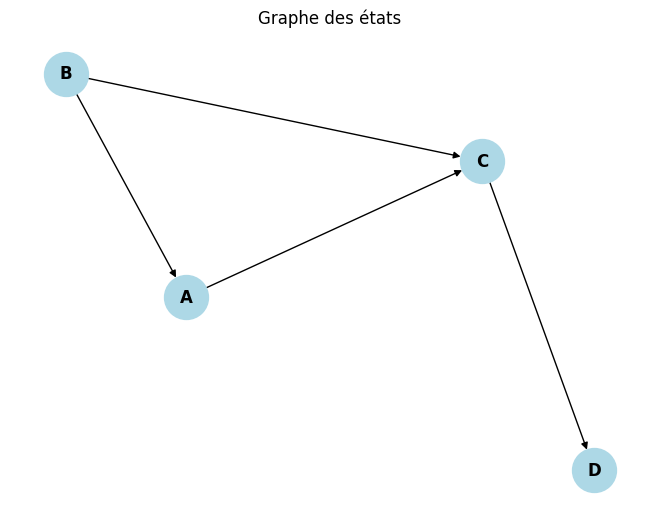

In [62]:
import networkx as nx
import matplotlib.pyplot as plt

# Définition du graphe
G = nx.DiGraph()

# Ajout des nœuds
nodes = ['A', 'B', 'C', 'D']
G.add_nodes_from(nodes)

# Ajout des arêtes
edges = [('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'D')]
G.add_edges_from(edges)

# Définition de la position des nœuds pour la visualisation
pos = nx.spring_layout(G)

# Dessin du graphe
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=12, font_weight='bold', arrows=True)

# Affichage de la visualisation
plt.title("Graphe des états")
plt.show()

In [52]:
class ColorAgent:
    def __init__(self, agent_id, domain, adjacency_matrix, agents):
        self.agent_id = agent_id
        self.domain = domain
        self.adjacency_matrix = adjacency_matrix
        self.agents = agents

    def is_nogood(self, assignment, color):
        agent_index = ord(self.agent_id) - ord('A')  # Convert agent ID to index
        for i, connected in enumerate(self.adjacency_matrix[agent_index]):
            if connected and assignment.get(chr(i + ord('A'))) == color:  # Convert index back to ID
                return True
        return False

    def backtracking(self, assignment):
        if self.agent_id in assignment:
            next_agent_id = chr(ord(self.agent_id) + 1)
            if next_agent_id in self.agents:
                return self.agents[next_agent_id].backtracking(assignment)
            else:
                return True

        for color in self.domain:
            if not self.is_nogood(assignment, color):
                assignment[self.agent_id] = color
                next_agent_id = chr(ord(self.agent_id) + 1)
                if next_agent_id in self.agents:
                    if self.agents[next_agent_id].backtracking(assignment):
                        return True
                    else:
                        del assignment[self.agent_id]
                else:
                    return True
        return False


def visualize_assignment(assignment):
    for agent_id, color in assignment.items():
        print(f"Agent {agent_id}: Color {color}")


if __name__ == '__main__':
    adjacency_matrix = [
       [0, 1, 1, 0],
       [1, 0, 1, 0],
       [1, 1, 0, 1],
       [0, 0, 1, 0]
    ]

    domain_dict = {
        'A': [0, 1, 2],
        'B': [0],
        'C': [1, 2],
        'D': [2]
    }

    agents = {}
    for agent_id, domain in domain_dict.items():
        agents[agent_id] = ColorAgent(agent_id, domain, adjacency_matrix, agents)

    assignment = {}
    result = agents['A'].backtracking(assignment)

    if result:
        print("Solution found:")
        visualize_assignment(assignment)
    else:
        print("No solution found.")


Solution found:
Agent A: Color 2
Agent B: Color 0
Agent C: Color 1
Agent D: Color 2


In [51]:
# Initialize empty adjacency matrix
adjacency_matrix = [
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
]

constraints_dict = {
    'A': [('C', '!=', 'A'), ('B', '!=', 'A')],
    'B': [('A', '!=', 'B'), ('C', '!=', 'B')],
    'C': [('D', '!=', 'C'), ('B', '!=', 'C'), ('A', '!=', 'C')],
    'D': [('C', '!=', 'D')]
}

# Update adjacency matrix based on constraints
for node, constraints in constraints_dict.items():
    node_index = ord(node) - ord('A')
    for constraint in constraints:
        other_node = constraint[0]
        other_node_index = ord(other_node) - ord('A')
        adjacency_matrix[node_index][other_node_index] = 1
        adjacency_matrix[other_node_index][node_index] = 1  # Since the graph is undirected

# Print adjacency matrix
for row in adjacency_matrix:
    print(row)


[0, 1, 1, 0]
[1, 0, 1, 0]
[1, 1, 0, 1]
[0, 0, 1, 0]


In [60]:
class ColorAgent:
    def __init__(self, agent_id, domain, adjacency_matrix, agents):
        self.agent_id = agent_id
        self.domain = domain
        self.adjacency_matrix = adjacency_matrix
        self.agents = agents

    def is_nogood(self, assignment, color):
        agent_index = ord(self.agent_id) - ord('A')
        for i, connected in enumerate(self.adjacency_matrix[agent_index]):
            if connected and assignment.get(chr(i + ord('A'))) == color:
                return True
        return False

    def backtracking(self, assignment):
        if self.agent_id in assignment:
            next_agent_id = chr(ord(self.agent_id) + 1)
            if next_agent_id in self.agents:
                return self.agents[next_agent_id].backtracking(assignment)
            else:
                return True

        for color in self.domain:
            if not self.is_nogood(assignment, color):
                assignment[self.agent_id] = color
                next_agent_id = chr(ord(self.agent_id) + 1)
                if next_agent_id in self.agents:
                    if self.agents[next_agent_id].backtracking(assignment):
                        return True
                    else:
                        del assignment[self.agent_id]
                else:
                    return True
        return False


def visualize_assignment(assignment):
    for agent_id, color in assignment.items():
        print(f"Agent {agent_id}: Color {color}")


def create_adjacency_matrix(constraints_dict):
    agents = sorted(constraints_dict.keys())
    n = len(agents)
    adjacency_matrix = [[0] * n for _ in range(n)]
    for agent, constraints in constraints_dict.items():
        for neighbor, _, _ in constraints:
            neighbor_index = agents.index(neighbor)
            adjacency_matrix[ord(agent) - ord('A')][neighbor_index] = 1
    return adjacency_matrix


if __name__ == '__main__':
    constraints_dict = {
        'A': [('C', '!=', 'A'), ('B', '!=', 'A')],
        'B': [('A', '!=', 'B'), ('C', '!=', 'B')],
        'C': [('D', '!=', 'C'), ('B', '!=', 'C'), ('A', '!=', 'C')],
        'D': [('C', '!=', 'D')]
    }

    adjacency_matrix = create_adjacency_matrix(constraints_dict)

    domain_dict = {
        'A': [0, 1, 2],
        'B': [0],
        'C': [1, 2],
        'D': [2]
    }

    agents = {}
    for agent_id, domain in domain_dict.items():
        agents[agent_id] = ColorAgent(agent_id, domain, adjacency_matrix, agents)

    assignment = {}
    result = agents['A'].backtracking(assignment)

    if result:
        print("Solution found:")
        visualize_assignment(assignment)
    else:
        print("No solution found.")


Solution found:
Agent A: Color 2
Agent B: Color 0
Agent C: Color 1
Agent D: Color 2
